# This notebook plots the BPZ statistics of a deepfield spectroscopic selected mock sample.

In [170]:
import os
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../plotting/')
import plots_zy as plot

## Read mock LSST sample with a combined [DEEP2, VVDS 2h field, zCOSMOS] selection 

In [316]:
outroot = os.path.expanduser('~')+'//DATA/mocks/cosmoDC2/KV450_mock/REALISATION/'

surveys = ['DEEP2','VVDSf02','zCOSMOS']
zspec_dc2mock_kv450 = np.array([])
zb_dc2mock_kv450 = np.array([])
mag_dc2mock_kv450 = np.array([])
for survey in surveys:
    KV450_path = outroot+'/'+survey+'_phot_samples/'+survey+'_phot_samples.fits'
    KV450_file = fits.open(KV450_path, mode="update")
    zspec_dc2mock_kv450 = np.hstack([zspec_dc2mock_kv450, KV450_file[1].data['redshift']])
    zb_dc2mock_kv450 = np.hstack([zb_dc2mock_kv450, KV450_file[1].data['Z_B']])
    mag_dc2mock_kv450 = np.hstack([mag_dc2mock_kv450, KV450_file[1].data['mag_r_lsst_obs']])
    

In [304]:

surveys = ['DEEP2','VVDSf02','zCOSMOS']
zspec_kv450 = np.array([])
zb_kv450 = np.array([])
mag_kv450 = np.array([])
for survey in surveys:
    KV450_path = os.path.expanduser('~')+'/DATA/mocks/KV450/SPECZ/DIR_'+survey+'.fits'
    KV450_file = fits.open(KV450_path, mode="update")
    zspec_kv450 = np.hstack([zspec_kv450, (KV450_file[1].data['z_spec_A'] + KV450_file[1].data['z_spec_B'] + KV450_file[1].data['z_spec_C'])/3])
    zb_kv450 = np.hstack([zb_kv450, KV450_file[1].data['Z_B']])
    mag_kv450 = np.hstack([mag_kv450, KV450_file[1].data['MAG_GAAP_r']])
    

In [306]:
outroot = os.path.expanduser('~')+'/DATA/mocks/cosmoDC2/LSST_10yr_mock/REALISATION/'

zspec_dc2mock_lsst = np.array([])
zb_dc2mock_lsst = np.array([])
mag_dc2mock_lsst = np.array([])
for survey in surveys:
    file_path = outroot+'/'+survey+'_phot_samples/'+survey+'_phot_samples.fits'
    lsst_file = fits.open(file_path, mode="update")
    zspec_dc2mock_lsst = np.hstack([zspec_dc2mock_lsst, lsst_file[1].data['redshift']])
    zb_dc2mock_lsst = np.hstack([zb_dc2mock_lsst, lsst_file[1].data['Z_B']])
    mag_dc2mock_lsst= np.hstack([mag_dc2mock_lsst, lsst_file[1].data['mag_r_lsst_obs']])

## BPZ scattered plot

(0.0, 3.0)

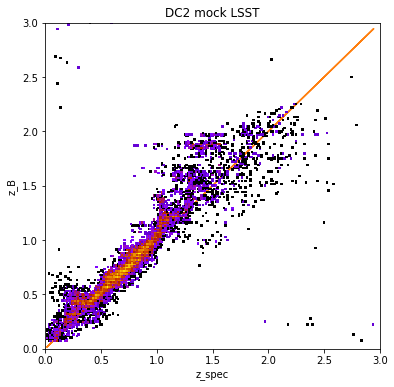

In [315]:
import copy
import matplotlib as mpl
fig = plt.figure(figsize=(6,6))
my_cmap = copy.copy(plt.cm.get_cmap("gnuplot"))
my_cmap.set_under('w',0.1)
plt.plot(zspec_dc2mock_lsst, zspec_dc2mock_lsst, color='C1', zorder=0)
plt.title('DC2 mock LSST')

h=plt.hist2d(zspec_dc2mock_lsst, zb_dc2mock_lsst, bins=(200,200), norm=mpl.colors.LogNorm(), cmap=my_cmap)
plt.xlabel('z_spec')
plt.ylabel('z_B')
plt.xlim(0, 3)
plt.ylim(0, 3)

(0.0, 3.0)

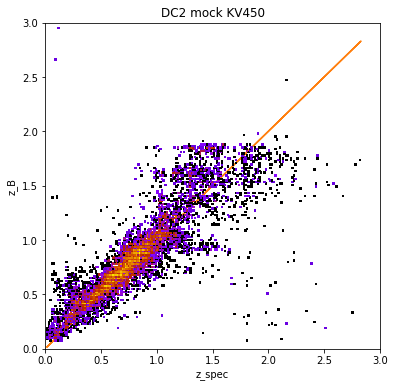

In [317]:
import copy
fig = plt.figure(figsize=(6,6))
my_cmap = copy.copy(plt.cm.get_cmap("gnuplot"))
my_cmap.set_under('w',0.1)
plt.plot(zspec_dc2mock_kv450, zspec_dc2mock_kv450, color='C1', zorder=0)
plt.title('DC2 mock KV450')
h=plt.hist2d(zspec_dc2mock_kv450, zb_dc2mock_kv450, bins=(200,200), norm=mpl.colors.LogNorm(), cmap=my_cmap)
plt.xlabel('z_spec')
plt.ylabel('z_B')
plt.xlim(0, 3)
plt.ylim(0, 3)

(0.0, 3.0)

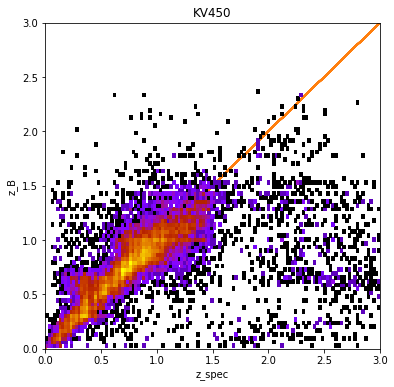

In [309]:
import copy
fig = plt.figure(figsize=(6,6))
my_cmap = copy.copy(plt.cm.get_cmap("gnuplot"))
my_cmap.set_under('w',0.1)
plt.plot(zspec_kv450, zspec_kv450, color='C1', zorder=0)
plt.title('KV450')
h=plt.hist2d(zspec_kv450, zb_kv450, bins=(200,200), norm=mpl.colors.LogNorm(), cmap=my_cmap)
plt.xlabel('z_spec')
plt.ylabel('z_B')
plt.xlim(0, 3)
plt.ylim(0, 3)

## BPZ statistics

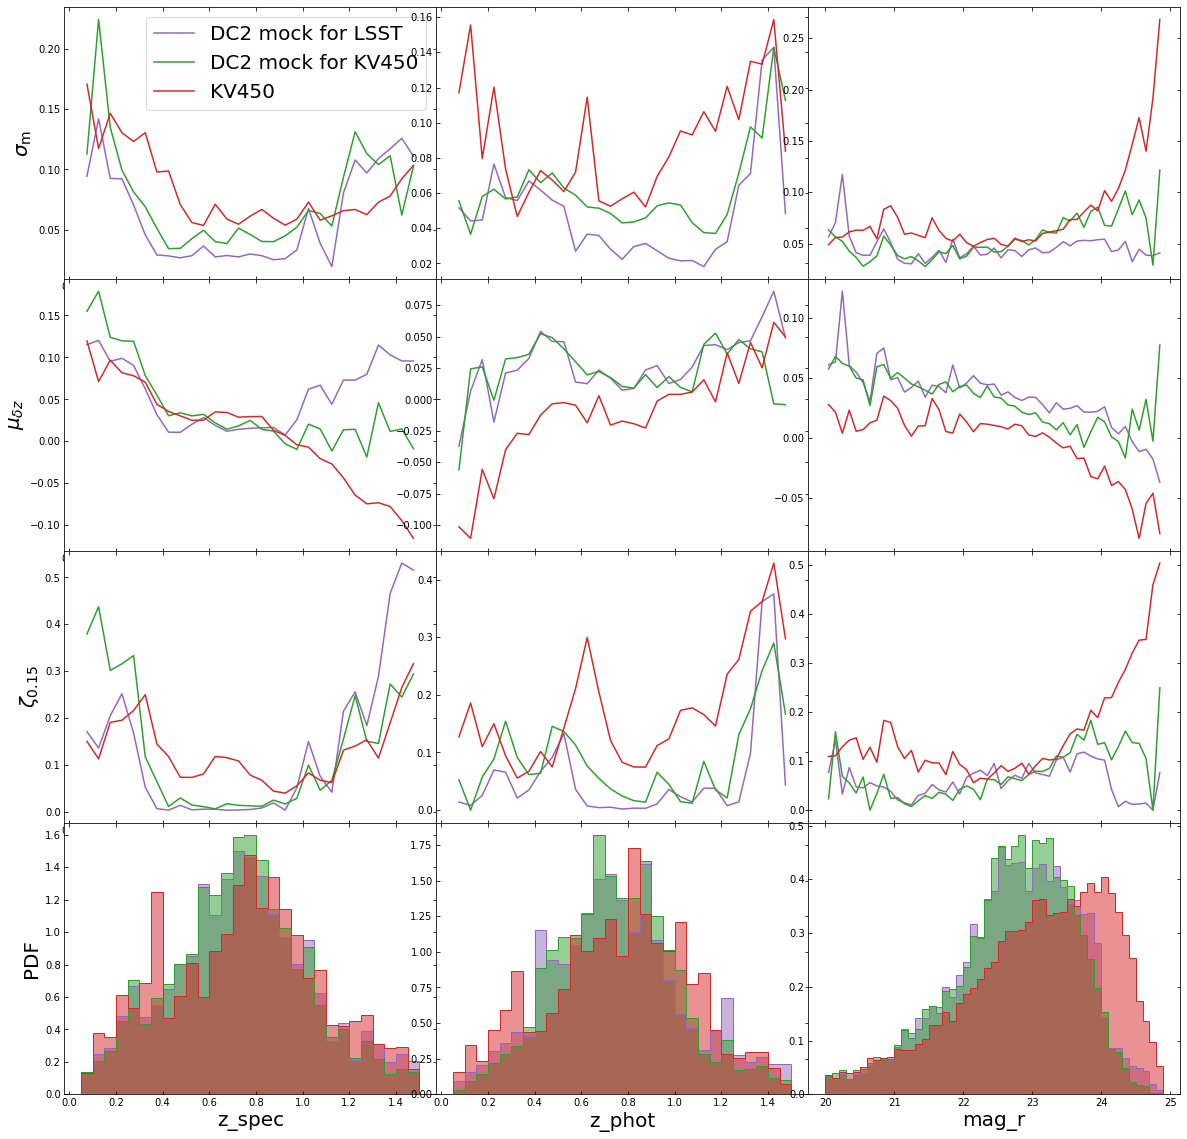

In [310]:
fig, axes = plt.subplots(4,3, figsize=(20, 20))
plot.plot_BPZ_stats(zspec_dc2mock_lsst, zb_dc2mock_lsst, mag_dc2mock_lsst, axes, color='C4',                    
                    survey_label='DC2 mock for LSST')

plot.plot_BPZ_stats(zspec_dc2mock_kv450, zb_dc2mock_kv450, mag_dc2mock_kv450, axes, color='C2',                     
                    survey_label='DC2 mock for KV450')

plot.plot_BPZ_stats(zspec_kv450, zb_kv450, mag_kv450, axes, color='C3',                     
                    survey_label='KV450')

axes[0][0].legend(fontsize=20)

for i in range(4):
    for j in range(3):
        axes[i][j].tick_params("both", direction="in",
                bottom=True, top=True, left=True, right=True)
        #axes[i][j].sharey(axes[i][0])
        axes[i][j].sharex(axes[0][j])
        axes[i][j].xaxis.label.set_size(20)
        axes[i][j].yaxis.label.set_size(20)

#axes[0][2].set_ylim(0, 0.2)
#axes[1][2].set_ylim(-0.2, 0.2)
plt.subplots_adjust(wspace=0, hspace=0) 

## BPZ statistics for mock LSST with 3 selections separately

../plotting/plots_zy.py:57: RuntimeWarning: invalid value encountered in true_divide
  np.abs(stat[bin_mask] - (dzs/znorms)[i]))
/net/home/fohlen13/yanza21/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/net/home/fohlen13/yanza21/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
../plotting/plots_zy.py:57: RuntimeWarning: invalid value encountered in true_divide
  np.abs(stat[bin_mask] - (dzs/znorms)[i]))
/net/home/fohlen13/yanza21/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/net/home/fohlen13/yanza21/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcou

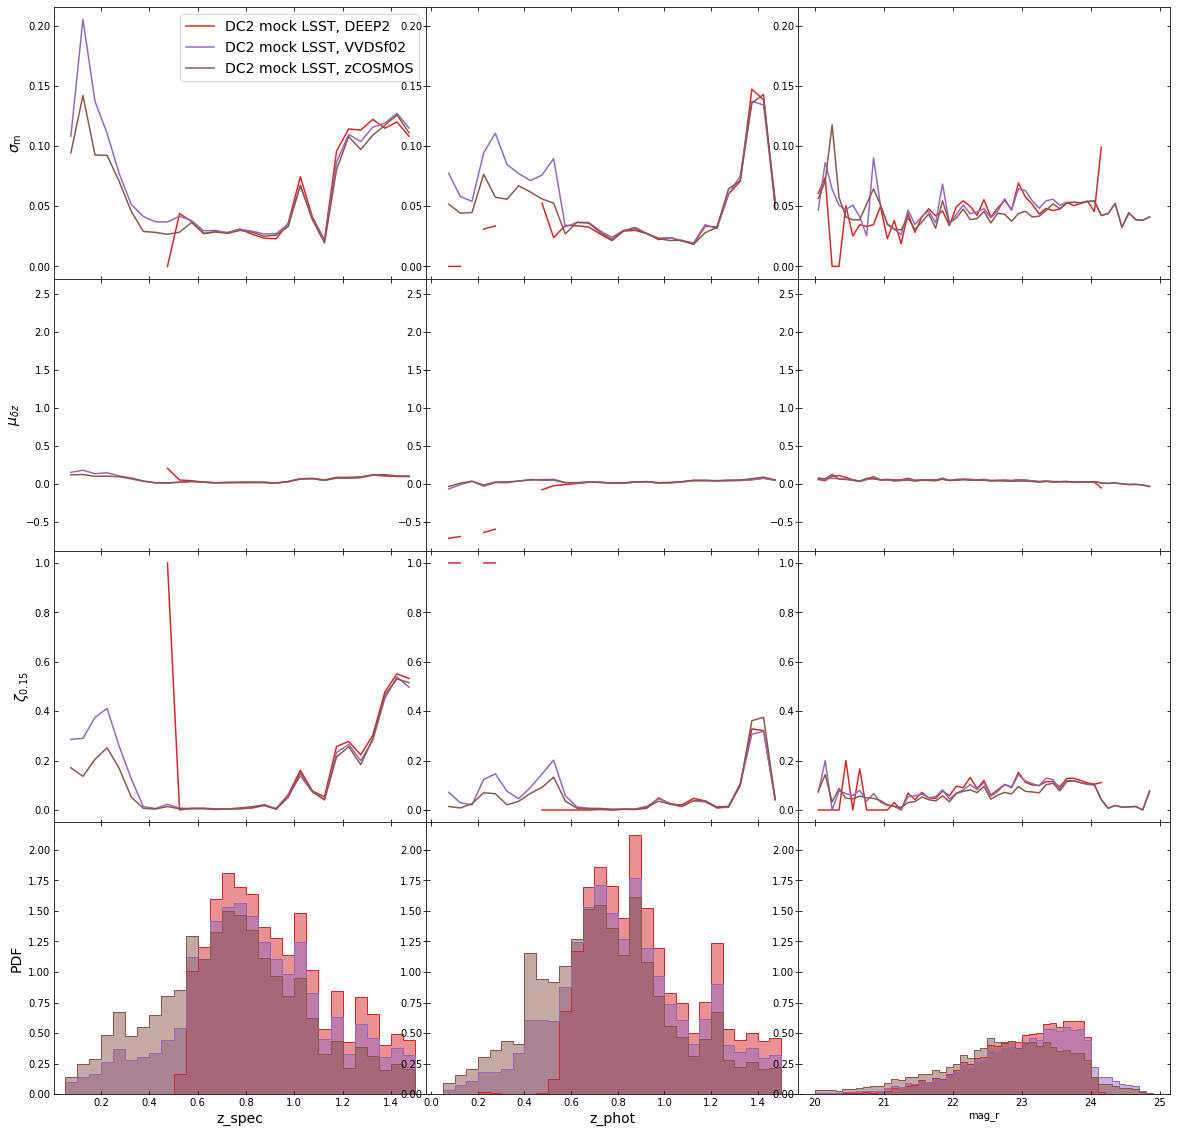

In [311]:
outroot = os.path.expanduser('~')+'/DATA/mocks/cosmoDC2/LSST_10yr_mock/REALISATION/'

fig, axes = plt.subplots(4,3, figsize=(20, 20))

magbins = {'SDSS_BOSS': np.arange(20, 22, .1),
          'WiggleZ': np.arange(20, 22, .1),
          'GAMA': np.arange(19, 20, .05),}

zbins = {'SDSS_BOSS': np.arange(0.05, 1.2+0.05, 0.05),
          'WiggleZ': np.arange(0.05, 1.2+0.05, 0.05),
          'GAMA': np.arange(0.05, 0.8+0.05, 0.05),}

surveys = ['DEEP2','VVDSf02','zCOSMOS']

colors = {'DEEP2':"C3",
         'VVDSf02':"C4",
         'zCOSMOS':"C5",}

zspec_dc2mock_lsst = np.array([])
zb_dc2mock_lsst = np.array([])
mag_dc2mock_lsst = np.array([])
for survey in surveys:
    file_path = outroot+'/'+survey+'_phot_samples/'+survey+'_phot_samples.fits'
    lsst_file = fits.open(file_path, mode="update")
    zspec_dc2mock_lsst = np.hstack([zspec_dc2mock_lsst, lsst_file[1].data['redshift']])
    zb_dc2mock_lsst = np.hstack([zb_dc2mock_lsst, lsst_file[1].data['Z_B']])
    mag_dc2mock_lsst= np.hstack([mag_dc2mock_lsst, lsst_file[1].data['mag_r_lsst_obs']])

    plot.plot_BPZ_stats(zspec_dc2mock_lsst, zb_dc2mock_lsst, mag_dc2mock_lsst, axes, 
                        color=colors[survey], 
                        survey_label='DC2 mock LSST, '+survey)
    
axes[0][0].legend(fontsize=14)

for i in range(4):
    for j in range(3):
        axes[i][j].tick_params("both", direction="in",
                bottom=True, top=True, left=True, right=True)
        axes[i][j].sharey(axes[i][0])
        axes[i][j].sharex(axes[0][j])

plt.subplots_adjust(wspace=0, hspace=0) 